# torva profit for ironmen

In [1]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Vector convention: [helmet, chest, legs, horn, vambraces, hilt]
probs = np.array([1/6, 1/6, 1/6, 1/6, 1/4, 1/12])
prices = np.array([177000000, 403444000, 385223000, 353326000, 190133000, 36875000])

In [3]:
def gen_dupes():
    
    # Roll from boss until full torva
    xs = np.zeros(6)
    while xs[0] == 0 or xs[1] == 0 or xs[2] == 0:
        xs += np.random.multinomial(1, probs)
    
    # Subtract torva from output
    xs -= np.array([1, 1, 1, 0, 0, 0])
    
    # Keep at least one of any other unique
    for i in range(3, 6):
        if xs[i] >= 1:
            xs[i] -= 1
    return xs

In [4]:
def gen_profits(N):
    
    xs = np.zeros(N)
    for i in range(N):
        xs[i] = gen_dupes() @ prices.T
    return xs

In [5]:
# Generate profit data for 4096 ironmen
N = 2**12
profits = gen_profits(N)

In [6]:
# Median profit
np.median(profits)

1134065000.0

In [7]:
# Maximum profit
np.max(profits)

13125499000.0

In [8]:
# Look at middle 99% of distribution
a = np.percentile(profits, 0.5)
b = np.percentile(profits, 99.5)
x = (profits[(profits<b) & (profits>a)])
np.size(x)

3661

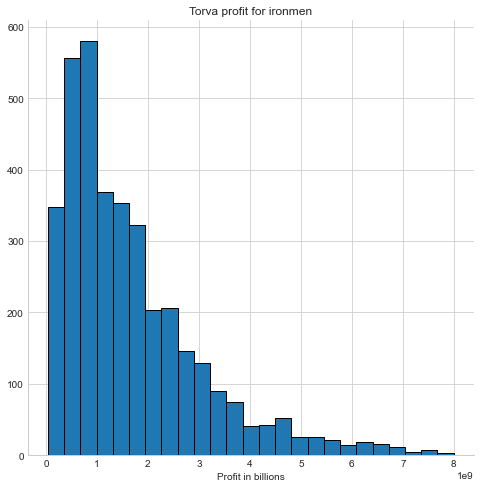

In [9]:
plt.style.use("seaborn-whitegrid")
fig, ax = plt.subplots(figsize=(8,8))
plt.title("Torva profit for ironmen")
plt.xlabel("Profit in billions")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.hist(x, bins = 25, ec = "black");